https://www.kaggle.com/c/web-traffic-time-series-forecasting/



https://github.com/floydwch/kaggle-cli

https://chrisalbon.com/python/pandas_time_series_basics.html

In [1]:
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# read data
train_data = pd.read_csv("./train_1.csv", engine='c') # executed in 19.5s

In [4]:
train_data.columns

Index(['Page', '2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
       '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09',
       ...
       '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
       '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31'],
      dtype='object', length=551)

In [5]:
train_data.columns[1:]

Index(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04', '2015-07-05',
       '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10',
       ...
       '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
       '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31'],
      dtype='object', length=550)

In [6]:
train_data.shape

(145063, 551)

In [7]:
train_data.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [8]:
train_data_clean = train_data.fillna(method="pad")

In [9]:
train_data_clean.head(10)

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0
5,5566_zh.wikipedia.org_all-access_spider,12.0,7.0,4.0,5.0,20.0,8.0,5.0,17.0,24.0,...,16.0,27.0,8.0,17.0,32.0,19.0,23.0,17.0,17.0,50.0
6,91Days_zh.wikipedia.org_all-access_spider,12.0,7.0,4.0,5.0,20.0,8.0,5.0,17.0,24.0,...,2.0,7.0,33.0,8.0,11.0,4.0,15.0,6.0,8.0,6.0
7,A'N'D_zh.wikipedia.org_all-access_spider,118.0,26.0,30.0,24.0,29.0,127.0,53.0,37.0,20.0,...,64.0,35.0,35.0,28.0,20.0,23.0,32.0,39.0,32.0,17.0
8,AKB48_zh.wikipedia.org_all-access_spider,5.0,23.0,14.0,12.0,9.0,9.0,35.0,15.0,14.0,...,34.0,105.0,72.0,36.0,33.0,30.0,36.0,38.0,31.0,97.0
9,ASCII_zh.wikipedia.org_all-access_spider,6.0,3.0,5.0,12.0,6.0,5.0,4.0,13.0,9.0,...,25.0,17.0,22.0,29.0,30.0,29.0,35.0,44.0,26.0,41.0


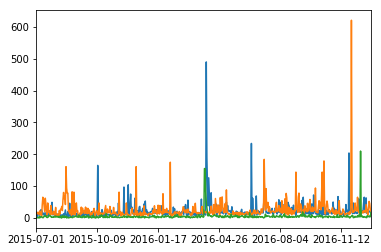

In [10]:
train_data_clean.iloc[0, 1:].plot()
train_data_clean.iloc[1, 1:].plot()
train_data_clean.iloc[2, 1:].plot()

In [11]:
keys = pd.read_csv("./key_1.csv", engine='c')

In [12]:
keys.shape

(8703780, 2)

In [13]:
145063*60 # predict future 3 months

8703780

In [14]:
keys.head()

,Page,Id
0,!vote_en.wikipedia.org_all-access_all-agents_2...,bf4edcf969af
1,!vote_en.wikipedia.org_all-access_all-agents_2...,929ed2bf52b9
2,!vote_en.wikipedia.org_all-access_all-agents_2...,ff29d0f51d5c
3,!vote_en.wikipedia.org_all-access_all-agents_2...,e98873359be6
4,!vote_en.wikipedia.org_all-access_all-agents_2...,fa012434263a


In [15]:
for i in range(60):
    print(keys['Page'][i]) # page_date

!vote_en.wikipedia.org_all-access_all-agents_2017-01-01
!vote_en.wikipedia.org_all-access_all-agents_2017-01-02
!vote_en.wikipedia.org_all-access_all-agents_2017-01-03
!vote_en.wikipedia.org_all-access_all-agents_2017-01-04
!vote_en.wikipedia.org_all-access_all-agents_2017-01-05
!vote_en.wikipedia.org_all-access_all-agents_2017-01-06
!vote_en.wikipedia.org_all-access_all-agents_2017-01-07
!vote_en.wikipedia.org_all-access_all-agents_2017-01-08
!vote_en.wikipedia.org_all-access_all-agents_2017-01-09
!vote_en.wikipedia.org_all-access_all-agents_2017-01-10
!vote_en.wikipedia.org_all-access_all-agents_2017-01-11
!vote_en.wikipedia.org_all-access_all-agents_2017-01-12
!vote_en.wikipedia.org_all-access_all-agents_2017-01-13
!vote_en.wikipedia.org_all-access_all-agents_2017-01-14
!vote_en.wikipedia.org_all-access_all-agents_2017-01-15
!vote_en.wikipedia.org_all-access_all-agents_2017-01-16
!vote_en.wikipedia.org_all-access_all-agents_2017-01-17
!vote_en.wikipedia.org_all-access_all-agents_201

-----

In [16]:
def SMAPE(y, y_hat):
    denom = np.abs(y) + np.abs(y_hat)
    err = np.abs(y-y_hat)/denom
    err[denom == 0] = 0
    return 200.0*np.nanmean(err)

## Models

In [17]:
## AR model by minimizing SMAPE
from functools import partial
from scipy.optimize import minimize

In [18]:
def loss_smape(lags, y, coff):
    """
    lags: N by k matrix
    y: 1D array of size N
    coff: 1D array of size k+1, (weight, bias)
    """
    w, b = coff[:-1], coff[-1]
    y_hat = lags.dot(w) + b
    return SMAPE(y, y_hat)

In [19]:
def fit_model(num_lags, access, verbose=True, coff_init=None, method='Nelder-Mead'):
    assert num_lags >= 1, \
        "num_lags must be at least 1, get {}".format(num_lags)
    access = access.fillna(0)
    win_size = num_lags+1
    X = []
    Y = []
    for index in range(0, len(access)-num_lags):
        window = access[index:index+win_size]
        lags, y = window[:-1], window[-1]
        if pd.isnull(y) or pd.isnull(lags).any():
            if verbose:
                print("skipping {}".format(series.index[index]))
            continue
        X.append(lags)
        Y.append(y)
    if len(X) == 0:
        return None
    X = np.array(X, dtype=np.float)
    Y = np.array(Y, dtype=np.float)
    loss = partial(loss_smape, X, Y)
    if coff_init is not None:
        coff = coff_init
    else:
        coff = np.random.rand(num_lags+1)
    fit_result = minimize(loss, coff, method=method)
    return fit_result

In [20]:
lags_to_try = [i for i in range(1, 15, 2)]

In [21]:
from collections import defaultdict
import time

In [22]:
def find_fits(lags_to_try, data):
    num_rows = data.shape[0]
    models = defaultdict(lambda: [])
    durations = []
    for row_index in range(num_rows):
        series = data.iloc[row_index, :]
        page, access = series[0], series[1:]
        print("Fitting model for {}".format(page))
        tic = time.time()
        for num_lags in lags_to_try:
            fit = fit_model(num_lags, access, verbose=False)
            if fit is None:
                print("Can't fit model for {} with lags {}".format(page, num_lags))
                print("Skipping following lags")
                break
            results = {}
            results["lags"] = num_lags
            results["loss"] = fit.fun
            results["success"] = fit.success
            results["x"] = fit.x
            models[page].append(results)
        toc = time.time()
        durations.append(toc-tic)
        if (row_index+1) % 10 == 0:
            print("mean fitting duration: {:.2f} seconds".format(sum(durations)/10))
            durations = []
    return models

In [23]:
# this will takes too long to finish....
# approximately 5 days on my laptop
#models = find_fits(lags_to_try, train_data)

In [49]:
# trying multiprocessing

In [5]:
%%writefile mp_fit_model.py
#!/usr/bin/env python3
import argparse
import sys
import pickle
from multiprocessing import Process
from multiprocessing import cpu_count, current_process
from multiprocessing import Queue, JoinableQueue
import pandas as pd
from tasks import fit_model


def worker(in_queue, out_queue):
    pid = current_process().pid
    while True:
        try:
            task = in_queue.get_nowait()
            lags_to_try, ts = task
            page, access = ts[0], ts[1:]
            print("[{}] Processing {}".format(pid, page), flush=True)
            results = {}
            for num_lags in lags_to_try:
                model = fit_model(num_lags, access)
                result = {}
                result["loss"] = model.fun
                result["success"] = model.success
                result["x"] = model.x
                results[num_lags] = result
            out_queue.put((page, results))
            in_queue.task_done()
        except Exception:
            pass


def consumer(out_queue):
    models = {}
    while True:
        try:
            record = out_queue.get_nowait()
            if record is None:
                break
            page, result = record
            models[page] = result
        except Exception:
            pass

    # Saving results
    with open("models.pickle", "wb") as wf:
        pickle.dump(models, wf)


if __name__ == "__main__":
    parser = argparse.ArgumentParser()
    parser.add_argument("-n", "--num-workers",
                        dest="num_workers",
                        help="number of processes",
                        default=cpu_count()*2,
                        type=int)
    args = vars(parser.parse_args())
    num_workers = args["num_workers"]

    print("reading data")
    train_data = pd.read_csv("./train_1.csv", engine='c')
    train_data.fillna(0, inplace=True)

    in_queue = JoinableQueue()
    out_queue = Queue()
    for _ in range(num_workers):
        p = Process(target=worker, args=(in_queue, out_queue,))
        p.daemon = True
        p.start()

    p_consume = Process(target=consumer, args=(out_queue,))
    p_consume.daemon = True
    p_consume.start()

    lags_to_try = [i for i in range(1, 9, 2)]
    num_series = train_data.shape[0]
    print("Setting input queue...")
    print("data enqued: 0.00%", flush=True)
    for index in range(num_series):
        series = train_data.iloc[index, :]
        in_queue.put((lags_to_try, series))
        if (index+1) % 10000 == 0:
            print("data enqued: {:.2f}%".format(100.0*(index+1)/num_series),
                  flush=True)
    print("data enqued: 100.00%", flush=True)
    in_queue.close()
    in_queue.join()
    print("Input queue joined", flush=True)
    out_queue.put(None)
    p_consume.join()
    print("consumer joined", flush=True)

    print("All tasks done")
    sys.exit(0)


Writing mp_fit_model.py


In [ ]:
!python3 ./mp_fit_model.py > fit_log.txt

-----

In [29]:
import datetime

In [41]:
start_date = datetime.datetime.strptime("01/01/2017", "%d/%m/%Y")

In [42]:
dates = [start_date+datetime.timedelta(days=i) for i in range(60)]

In [43]:
dates[-1]

datetime.datetime(2017, 3, 1, 0, 0)

In [50]:
url_str = "!vote_en.wikipedia.org_all-access_all-agents"
for date in dates:
    s = "{}_{}".format(url_str, date.date())
    print("{}: {}".format(s, keys.loc[s, "Id"]))

!vote_en.wikipedia.org_all-access_all-agents_2017-01-01: bf4edcf969af
!vote_en.wikipedia.org_all-access_all-agents_2017-01-02: 929ed2bf52b9
!vote_en.wikipedia.org_all-access_all-agents_2017-01-03: ff29d0f51d5c
!vote_en.wikipedia.org_all-access_all-agents_2017-01-04: e98873359be6
!vote_en.wikipedia.org_all-access_all-agents_2017-01-05: fa012434263a
!vote_en.wikipedia.org_all-access_all-agents_2017-01-06: 48f1e93517a2
!vote_en.wikipedia.org_all-access_all-agents_2017-01-07: 5def418fcb36
!vote_en.wikipedia.org_all-access_all-agents_2017-01-08: 77bd08134351
!vote_en.wikipedia.org_all-access_all-agents_2017-01-09: 5889e6dbb16f
!vote_en.wikipedia.org_all-access_all-agents_2017-01-10: 5f21fef1d764
!vote_en.wikipedia.org_all-access_all-agents_2017-01-11: 6f07e1b8815a
!vote_en.wikipedia.org_all-access_all-agents_2017-01-12: 228e54b5dea0
!vote_en.wikipedia.org_all-access_all-agents_2017-01-13: da1b34963ed7
!vote_en.wikipedia.org_all-access_all-agents_2017-01-14: ab5ccefaa2db
!vote_en.wikipedia.o

------

In [ ]:
# last 2 month submission


------

In [3]:
# mean submission
# found from https://www.kaggle.com/davidfumo/page-mean-lb-65-3/code
train = train_data.copy()
submission = keys.copy()

submission['Page'] = submission.Page.apply(lambda a: a[:-11])
train['Visits'] = train.drop('Page', axis=1).mean(axis=1, skipna=True).round(decimals=2)

submission = submission.merge(train[['Page','Visits']], how='left')
submission.loc[submission.Visits.isnull(), 'Visits'] = 0
submission[['Id','Visits']].to_csv('mean_submission.csv', index=False)

del train, submission

-----

In [47]:
# medium submission
# mean submission
# found from https://www.kaggle.com/davidfumo/page-mean-lb-65-3/code
train = train_data.copy()
submission = keys.copy()

submission['Page'] = submission.Page.apply(lambda a: a[:-11])
train['Visits'] = train.drop('Page', axis=1).median(axis=1, skipna=True)

submission = submission.merge(train[['Page','Visits']], how='left')
submission.loc[submission.Visits.isnull(), 'Visits'] = 0
submission[['Id','Visits']].to_csv('median_submission.csv', index=False)

del train, submission

-----

In [ ]:
# 8 weeks medium
train = train_data.copy()
submission = keys.copy()

submission['Page'] = submission.Page.apply(lambda a: a[:-11])
train["Visits"] = train.iloc[:, -56:].median(axis=1, skipna=True)

submission = submission.merge(train[["Page", "Visits"]], how="left")
submission.loc[submission["Visits"].isnull(), "Visits"] = 0
submission[["Id", "Visits"]].to_csv("eight_week_median.csv", index=False)

del train, submission

-----

In [17]:
# 8 weeks mean
train = train_data.copy()
submission = keys.copy()

submission['Page'] = submission.Page.apply(lambda a: a[:-11])
train["Visits"] = train.iloc[:, -56:].mean(axis=1, skipna=True).round(decimals=2)

submission = submission.merge(train[["Page", "Visits"]], how="left")
submission.loc[submission["Visits"].isnull(), "Visits"] = 0
submission[["Id", "Visits"]].to_csv("eight_week_mean.csv", index=False)

del train, submission

------

In [25]:
# 4 weeks median
train = train_data.copy()
submission = keys.copy()

submission["Page"] = submission.Page.apply(lambda a: a[:-11])
train["Visits"] = train.iloc[:, -28:].median(axis=1, skipna=True)

submission = submission.merge(train[["Page", "Visits"]], how="left")
submission.loc[submission["Visits"].isnull(), "Visits"] = 0
submission[["Id", "Visits"]].to_csv("four_week_median.csv", index=False)

del train, submission

----

In [66]:
def clean_data_median(df):
    clean_df = df.copy()
    for i in range(clean_df.shape[0]):
        med = clean_df.iloc[i, 1:].median(skipna=True)
        clean_df.iloc[i, 1:].fillna(med, inplace=True)
    return clean_df

In [67]:
clean_data_median(train_data).head(20)

KeyboardInterrupt: 

In [17]:
import random

In [47]:
class TSSampler(object):
    """
    Time Series Random Sampler
    """
    def __init__(self, data_frame):
        self._df = data_frame
    
    def sample(self, lag=2, n=10):
        num_columns = len(self._df.columns)
        indices = random.sample(range(lag, num_columns), n)
        return [tuple(idx-l for l in range(lag, -1, -1)) for idx in indices]

In [48]:
sampler = TSSampler(train_data)

In [52]:
sampler.sample(n=20)

[(537, 538, 539),
 (309, 310, 311),
 (471, 472, 473),
 (267, 268, 269),
 (474, 475, 476),
 (299, 300, 301),
 (169, 170, 171),
 (71, 72, 73),
 (470, 471, 472),
 (437, 438, 439),
 (4, 5, 6),
 (51, 52, 53),
 (113, 114, 115),
 (290, 291, 292),
 (201, 202, 203),
 (306, 307, 308),
 (343, 344, 345),
 (182, 183, 184),
 (506, 507, 508),
 (349, 350, 351)]

------

## References

- [Basic](https://chrisalbon.com/python/pandas_time_series_basics.html)